# Preprocessing

In [78]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

In [79]:
raw_df = pd.read_csv("../../../Data/number_of_deaths_raw_data.csv")
raw_df.head(10)

,Prematurity,Birth asphyxia and birth trauma,Sepsis and other infectious conditions of the newborn,Other Group 1 (postneonatal only),Congenital anomalies,Other noncommunicable diseases (postneonatal only),Injuries,Tuberculosis,Other Group 1 and Other noncommunicable (neonatal and under-5 only),HIV/AIDS,Diarrhoeal diseases,Pertussis,Tetanus,Measles,Meningitis/encephalitis,Malaria,Acute lower respiratory infections,CountryName,Year
0,19333.41926,11691.37210,4489.50404,NaN,1534.08344,NaN,371.28902,0.0,10579.92644,0.22891,1973.08786,NaN,2331.69796,0.0,1395.33839,0.0,6908.05259,Afghanistan,2000
1,14761.72219,10042.87869,2977.92908,NaN,1405.50824,NaN,130.32201,0.0,3849.14708,30.31433,724.01316,NaN,768.57928,0.0,357.27433,0.0,4267.31161,Angola,2000
2,351.16760,110.05251,17.54192,NaN,106.22332,NaN,4.31283,0.0,30.48989,0.00347,0.77210,NaN,0.09764,0.0,10.36631,0.0,36.97242,Albania,2000
3,3.00000,0.00000,0.00000,NaN,0.00000,NaN,0.00000,0.0,0.00000,0.00000,0.00000,NaN,0.00000,0.0,0.00000,0.0,0.00000,Andorra,2000
4,137.90854,26.85080,2.86905,NaN,75.66284,NaN,1.78464,0.0,66.57905,0.10435,0.00000,NaN,0.00000,0.0,0.15043,0.0,0.09029,United Arab Emirates,2000
5,3662.78364,799.63672,846.48628,NaN,1800.51370,NaN,102.21722,0.0,559.00042,1.06476,0.00000,NaN,0.00000,0.0,22.36002,0.0,146.93724,Argentina,2000
6,294.41638,124.54276,32.03906,NaN,90.42745,NaN,1.84814,0.0,55.49606,0.00261,2.10067,NaN,0.33695,0.0,0.22528,0.0,40.56464,Armenia,2000
7,2.00000,8.00000,0.00000,NaN,4.00000,NaN,0.00000,0.0,0.00000,0.00000,0.00000,NaN,0.00000,0.0,0.00000,0.0,0.00000,Antigua and Barbuda,2000
8,205.09423,141.19553,38.13310,NaN,270.02355,NaN,6.18375,0.0,207.15548,0.00000,0.00000,NaN,0.00000,0.0,2.06125,0.0,5.15312,Australia,2000
9,92.16000,23.04000,5.76000,NaN,89.28000,NaN,5.76000,0.0,21.12000,0.00000,0.00000,NaN,0.00000,0.0,0.00000,0.0,2.88000,Austria,2000


In [80]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4268 entries, 0 to 4267
Data columns (total 19 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Prematurity                                                          4268 non-null   float64
 1   Birth asphyxia and birth trauma                                      4268 non-null   float64
 2   Sepsis and other infectious conditions of the newborn                4268 non-null   float64
 3   Other Group 1 (postneonatal only)                                    0 non-null      float64
 4   Congenital anomalies                                                 4268 non-null   float64
 5   Other noncommunicable diseases (postneonatal only)                   0 non-null      float64
 6   Injuries                                                             4268 non-null   float64
 7   Tuberc

In [81]:
raw_df = raw_df.drop(['Other Group 1 (postneonatal only)', 'Other noncommunicable diseases (postneonatal only)', 'Pertussis'], axis=1)
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4268 entries, 0 to 4267
Data columns (total 16 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Prematurity                                                          4268 non-null   float64
 1   Birth asphyxia and birth trauma                                      4268 non-null   float64
 2   Sepsis and other infectious conditions of the newborn                4268 non-null   float64
 3   Congenital anomalies                                                 4268 non-null   float64
 4   Injuries                                                             4268 non-null   float64
 5   Tuberculosis                                                         4268 non-null   float64
 6   Other Group 1 and Other noncommunicable (neonatal and under-5 only)  4268 non-null   float64
 7   HIV/AI

In [82]:
shape = raw_df.shape
shape

(4268, 16)

In [83]:

print(f"Current shape: {shape}")

if shape[0] > 1000 and shape[1] > 5:
    print(f"Your data good!.")
else:
    print(f"Your raw data absolutely small. Please choose larger year interval.!")
    

Current shape: (4268, 16)
Your data good!.


In [84]:
num_duplicated_rows = raw_df.duplicated().sum()
# TEST
if num_duplicated_rows == 0:
    print(f"Your raw data have no duplicated line.!")
else:
    if num_duplicated_rows > 1:
        ext = "lines"
    else:
        ext = "line"
    print(f"Your raw data have {num_duplicated_rows} duplicated " + ext + ". Please de-deduplicate your raw data.!")

Your raw data have no duplicated line.!


In [85]:
col_meaning_df = pd.read_csv("../../../Data/causes_of_death.csv")
col_meaning_df

,Causes_ID,Causes_Name
0,CH10,Prematurity
1,CH11,Birth asphyxia and birth trauma
2,CH12,Sepsis and other infectious conditions of the newborn
3,CH13,Other Group 1 (postneonatal only)
4,CH15,Congenital anomalies
5,CH16,Other noncommunicable diseases (postneonatal only)
6,CH17,Injuries
7,CH18,Tuberculosis
8,CH19,Other Group 1 and Other noncommunicable (neonatal and under-5 only)
9,CH2,HIV/AIDS


In [86]:
dtypes = raw_df.dtypes
dtypes

Prematurity                                                            float64
Birth asphyxia and birth trauma                                        float64
Sepsis and other infectious conditions of the newborn                  float64
Congenital anomalies                                                   float64
Injuries                                                               float64
Tuberculosis                                                           float64
Other Group 1 and Other noncommunicable (neonatal and under-5 only)    float64
HIV/AIDS                                                               float64
Diarrhoeal diseases                                                    float64
Tetanus                                                                float64
Measles                                                                float64
Meningitis/encephalitis                                                float64
Malaria                                             

In [87]:
raw_df["Year"] = raw_df["Year"].astype('str')
raw_df["Year"]

0       2000
1       2000
2       2000
3       2000
4       2000
        ... 
4263    2021
4264    2021
4265    2021
4266    2021
4267    2021
Name: Year, Length: 4268, dtype: object

In [88]:
# TEST
dtypes = raw_df.dtypes
float_cols = set(dtypes[(dtypes==np.float32) | (dtypes==np.float64)].index)
assert len(float_cols) == 14
cate_cols, object_cols = set(dtypes[dtypes == pd.Categorical].index), set(dtypes[dtypes == object].index)
assert (len(cate_cols) == 2 and len(object_cols) == 2)
dtypes

Prematurity                                                            float64
Birth asphyxia and birth trauma                                        float64
Sepsis and other infectious conditions of the newborn                  float64
Congenital anomalies                                                   float64
Injuries                                                               float64
Tuberculosis                                                           float64
Other Group 1 and Other noncommunicable (neonatal and under-5 only)    float64
HIV/AIDS                                                               float64
Diarrhoeal diseases                                                    float64
Tetanus                                                                float64
Measles                                                                float64
Meningitis/encephalitis                                                float64
Malaria                                             

In [89]:

def missing_ratio(column):
    return (column.isna().mean() * 100).round(2)

def lower_quartile(column):
    return column.quantile(0.25).round(2)

def median(column):
    result = float(round(column.median()))
    return result

def upper_quartile(column):
    return column.quantile(0.75).round(2)

num_col_info_df = raw_df.select_dtypes(exclude='object')


num_col_info_df = num_col_info_df.agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])
num_col_info_df.loc['min'] = np.float64(num_col_info_df.loc['min']).round(1)
num_col_info_df.loc['max'] = np.float64(num_col_info_df.loc['max']).round(1)
num_col_info_df


,Prematurity,Birth asphyxia and birth trauma,Sepsis and other infectious conditions of the newborn,Congenital anomalies,Injuries,Tuberculosis,Other Group 1 and Other noncommunicable (neonatal and under-5 only),HIV/AIDS,Diarrhoeal diseases,Tetanus,Measles,Meningitis/encephalitis,Malaria,Acute lower respiratory infections
missing_ratio,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00
min,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00
lower_quartile,70.14,22.60,7.45,38.95,1.01,0.0,12.47,0.0,0.00,0.00,0.0,0.00,0.0,2.27
median,545.00,210.00,74.00,227.00,6.00,0.0,135.00,0.0,0.00,0.00,0.0,2.00,0.0,47.00
upper_quartile,3876.47,1824.56,620.37,924.82,43.52,0.0,914.27,2.8,70.08,17.61,0.0,37.72,0.0,641.48
max,471918.30,298170.70,82234.60,67695.00,25857.70,0.0,177459.50,319.5,24877.80,14583.00,0.0,8271.50,4.3,128085.40


In [90]:
dict(num_col_info_df.iloc[0])

{'Prematurity': 0.0,
 'Birth asphyxia and birth trauma': 0.0,
 'Sepsis and other infectious conditions of the newborn': 0.0,
 'Congenital anomalies': 0.0,
 'Injuries': 0.0,
 'Tuberculosis': 0.0,
 'Other Group 1 and Other noncommunicable (neonatal and under-5 only)': 0.0,
 'HIV/AIDS': 0.0,
 'Diarrhoeal diseases': 0.0,
 'Tetanus': 0.0,
 'Measles': 0.0,
 'Meningitis/encephalitis': 0.0,
 'Malaria': 0.0,
 'Acute lower respiratory infections': 0.0}

In [91]:
raw_df.select_dtypes(exclude='object').agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])

,Prematurity,Birth asphyxia and birth trauma,Sepsis and other infectious conditions of the newborn,Congenital anomalies,Injuries,Tuberculosis,Other Group 1 and Other noncommunicable (neonatal and under-5 only),HIV/AIDS,Diarrhoeal diseases,Tetanus,Measles,Meningitis/encephalitis,Malaria,Acute lower respiratory infections
missing_ratio,0.000,0.0000,0.0000,0.00000,0.00000,0.0,0.0000,0.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.0000
min,0.000,0.0000,0.0000,0.00000,0.00000,0.0,0.0000,0.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.0000
lower_quartile,70.140,22.6000,7.4500,38.95000,1.01000,0.0,12.4700,0.00000,0.00000,0.00000,0.0,0.00000,0.00000,2.2700
median,545.000,210.0000,74.0000,227.00000,6.00000,0.0,135.0000,0.00000,0.00000,0.00000,0.0,2.00000,0.00000,47.0000
upper_quartile,3876.470,1824.5600,620.3700,924.82000,43.52000,0.0,914.2700,2.80000,70.08000,17.61000,0.0,37.72000,0.00000,641.4800
max,471918.301,298170.7302,82234.5809,67694.97464,25857.69943,0.0,177459.5267,319.48917,24877.79564,14583.01862,0.0,8271.54976,4.26929,128085.4417


In [92]:
pd.set_option('display.max_colwidth', 100) 
pd.set_option('display.max_columns', None) 

In [93]:

def num_values(column):
    return column.nunique()

def value_ratios(column):
    return dict((column.value_counts(normalize=True) * 100).round(1))

cat_col_info_df = raw_df.select_dtypes(include='object')


cat_col_info_df = cat_col_info_df.agg([missing_ratio, num_values, value_ratios])
cat_col_info_df

,CountryName,Year
missing_ratio,0.0,0.0
num_values,194,22
value_ratios,"{'Afghanistan': 0.5, 'Qatar': 0.5, 'Malaysia': 0.5, 'Namibia': 0.5, 'Niger': 0.5, 'Nigeria': 0.5...","{'2000': 4.5, '2001': 4.5, '2020': 4.5, '2019': 4.5, '2018': 4.5, '2017': 4.5, '2016': 4.5, '201..."


In [94]:
print(f"Total number of features: {raw_df.shape[1]}")
raw_df.dtypes

Total number of features: 16


Prematurity                                                            float64
Birth asphyxia and birth trauma                                        float64
Sepsis and other infectious conditions of the newborn                  float64
Congenital anomalies                                                   float64
Injuries                                                               float64
Tuberculosis                                                           float64
Other Group 1 and Other noncommunicable (neonatal and under-5 only)    float64
HIV/AIDS                                                               float64
Diarrhoeal diseases                                                    float64
Tetanus                                                                float64
Measles                                                                float64
Meningitis/encephalitis                                                float64
Malaria                                             

In [95]:
raw_df.to_csv("../../../Data/number_of_deaths_processed_data.csv", index=False)

# Exploration

In [96]:
cleaned_df = pd.read_csv("../../../Data/number_of_deaths_processed_data.csv")
cleaned_df

,Prematurity,Birth asphyxia and birth trauma,Sepsis and other infectious conditions of the newborn,Congenital anomalies,Injuries,Tuberculosis,Other Group 1 and Other noncommunicable (neonatal and under-5 only),HIV/AIDS,Diarrhoeal diseases,Tetanus,Measles,Meningitis/encephalitis,Malaria,Acute lower respiratory infections,CountryName,Year
0,19333.41926,11691.37210,4489.50404,1534.08344,371.28902,0.0,10579.92644,0.22891,1973.08786,2331.69796,0.0,1395.33839,0.0,6908.05259,Afghanistan,2000
1,14761.72219,10042.87869,2977.92908,1405.50824,130.32201,0.0,3849.14708,30.31433,724.01316,768.57928,0.0,357.27433,0.0,4267.31161,Angola,2000
2,351.16760,110.05251,17.54192,106.22332,4.31283,0.0,30.48989,0.00347,0.77210,0.09764,0.0,10.36631,0.0,36.97242,Albania,2000
3,3.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.00000,0.00000,0.0,0.00000,0.0,0.00000,Andorra,2000
4,137.90854,26.85080,2.86905,75.66284,1.78464,0.0,66.57905,0.10435,0.00000,0.00000,0.0,0.15043,0.0,0.09029,United Arab Emirates,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4263,17.45855,5.56010,2.93639,7.28102,0.25978,0.0,4.18806,0.00000,0.00000,0.00000,0.0,0.15554,0.0,1.16055,Samoa,2021
4264,11286.37393,6796.63328,1742.58956,2227.89226,229.08594,0.0,3051.97336,0.90444,521.35998,129.94279,0.0,44.07145,0.0,2523.17301,Yemen,2021
4265,4634.07215,2595.54661,1828.98610,1315.87236,166.21530,0.0,1708.85383,36.14888,0.00000,0.00000,0.0,16.01934,0.0,677.28544,South Africa,2021
4266,6920.62510,4054.12780,912.70245,1274.53105,35.09944,0.0,1776.66284,22.93804,134.08604,23.52546,0.0,108.91078,0.0,1228.79101,Zambia,2021


In [97]:
cleaned_df.dtypes

Prematurity                                                            float64
Birth asphyxia and birth trauma                                        float64
Sepsis and other infectious conditions of the newborn                  float64
Congenital anomalies                                                   float64
Injuries                                                               float64
Tuberculosis                                                           float64
Other Group 1 and Other noncommunicable (neonatal and under-5 only)    float64
HIV/AIDS                                                               float64
Diarrhoeal diseases                                                    float64
Tetanus                                                                float64
Measles                                                                float64
Meningitis/encephalitis                                                float64
Malaria                                             

In [98]:

df_copy = cleaned_df.drop(['Year', 'CountryName'], axis='columns')
def mode (column):
    return column.mode().iloc[0]
def quantile_25 (column):
    return column.quantile(0.25)
def quantile_50 (column):
    return column.quantile(0.5)
def quantile_75 (column):
    return column.quantile(0.75)
def r(column):
    return column.max() - column.min()
def iqr (column):
    return column.quantile(0.75) - column.quantile(0.25)
def CoV(column):
    if (column.mean() != 0):
        return column.std() / column.mean() * 100
    else: return np.nan
    
# YOUR CODE HERE
df_copy.describe()
df_copy.agg(['mean', 'median', mode, quantile_25, quantile_50, quantile_75, r, iqr, 'var', 'std', 
                       CoV, 'skew', 'kurtosis', 'sem'])


,Prematurity,Birth asphyxia and birth trauma,Sepsis and other infectious conditions of the newborn,Congenital anomalies,Injuries,Tuberculosis,Other Group 1 and Other noncommunicable (neonatal and under-5 only),HIV/AIDS,Diarrhoeal diseases,Tetanus,Measles,Meningitis/encephalitis,Malaria,Acute lower respiratory infections
mean,5.812561e+03,3.928405e+03,1.188858e+03,1.380642e+03,112.918540,0.0,1.791220e+03,10.302254,2.633549e+02,100.756327,0.0,128.580262,0.009382,1.498886e+03
median,5.453493e+02,2.099115e+02,7.441430e+01,2.267736e+02,6.220475,0.0,1.348876e+02,0.049895,0.000000e+00,0.017810,0.0,2.395735,0.000000,4.710674e+01
mode,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000e+00
quantile_25,7.014113e+01,2.260115e+01,7.445525e+00,3.894727e+01,1.010195,0.0,1.247304e+01,0.000000,0.000000e+00,0.000000,0.0,0.000000,0.000000,2.274477e+00
quantile_50,5.453493e+02,2.099115e+02,7.441430e+01,2.267736e+02,6.220475,0.0,1.348876e+02,0.049895,0.000000e+00,0.017810,0.0,2.395735,0.000000,4.710674e+01
quantile_75,3.876471e+03,1.824562e+03,6.203677e+02,9.248202e+02,43.523832,0.0,9.142704e+02,2.800435,7.007547e+01,17.611492,0.0,37.719220,0.000000,6.414830e+02
r,4.719183e+05,2.981707e+05,8.223458e+04,6.769497e+04,25857.699430,0.0,1.774595e+05,319.489170,2.487780e+04,14583.018620,0.0,8271.549760,4.269290,1.280854e+05
iqr,3.806330e+03,1.801961e+03,6.129222e+02,8.858729e+02,42.513637,0.0,9.017974e+02,2.800435,7.007547e+01,17.611492,0.0,37.719220,0.000000,6.392086e+02
var,6.637410e+08,3.016520e+08,2.639153e+07,2.716985e+07,729717.182068,0.0,8.629959e+07,1264.428925,1.693862e+06,365947.097234,0.0,414481.933644,0.017945,5.060978e+07
std,2.576317e+04,1.736813e+04,5.137268e+03,5.212470e+03,854.234852,0.0,9.289757e+03,35.558809,1.301484e+03,604.935614,0.0,643.802713,0.133958,7.114055e+03


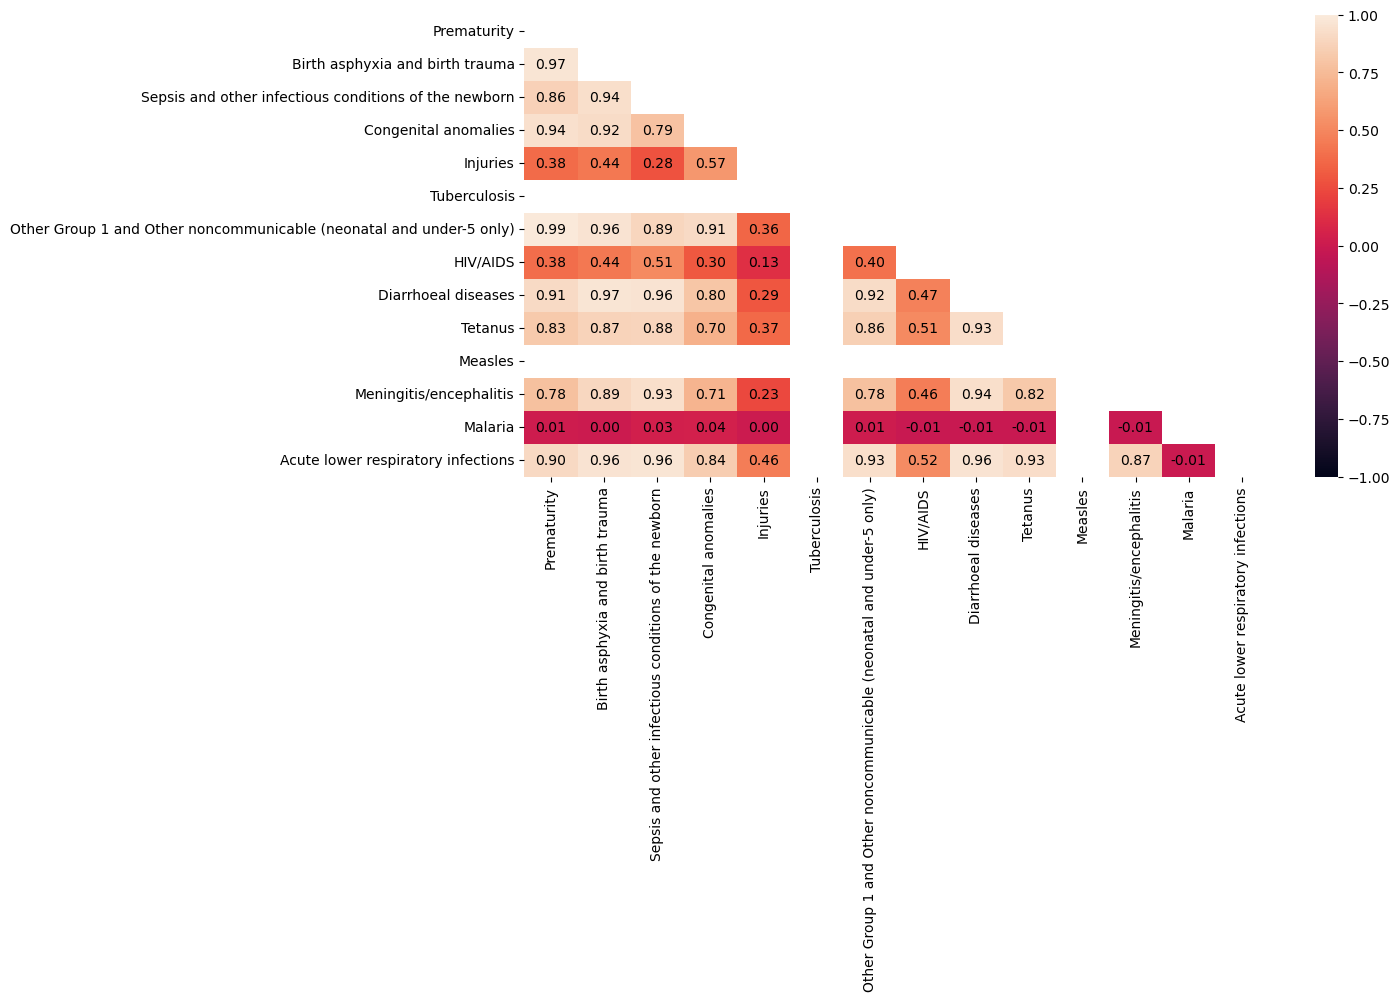

In [102]:
df_copy = cleaned_df.copy()
df_copy = df_copy.drop(['Year', 'CountryName'], axis='columns')
# Ma trận hệ số tương quan
corr_matrix = df_copy.corr()

# Tam giác dưới không lấy đường chéo của ma trận hệ số tương quan
corr_values = corr_matrix.where(np.tril(np.ones(corr_matrix.shape), k=-1).astype('bool'))

# vẽ biểu đồ heatmap
heatmap = sn.heatmap(corr_values, vmin=-1, vmax=1)
for i in range(len(corr_values)):
    for j in range(len(corr_values)):
        # Kiểm tra giá trị khác NaN
        if not pd.isna(corr_values.iloc[i, j]):
            heatmap.text(j+0.5, i+0.5, '{:.2f}'.format(corr_values.iloc[i, j]), ha='center', va='center', color='black')

plt.xticks(rotation=90)
fig = plt.gcf()
fig.set_size_inches(12, 6)

plt.show()
